In [2]:
import numpy as np                      # for mahematical operations
import pandas as pd                     # for data manipulation and cleaning
import seaborn as sns                   # for data visulization
import plotly.express as px             # for data visulization
import matplotlib.pyplot as plt         # for data visulization

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [3]:
# Read in dataset
df = pd.read_csv('../data/diabetes_prediction_dataset.csv')

In [4]:
df.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0


### Data Dictionary

| variable       | class     | description                                                                  |
|:---------------|:----------|:-----------------------------------------------------------------------------|
| Gender               | character | Biological sex of the individual  |
| Age                  | numeric   | Age of the individual  |
| Hypertension         | numeric   | 0 = No Hypertension / 1 = Has Hypertension|
| Heart_disease        | numeric   | 0 = No Heart disease / 1 = Has Heart disease|
| Smoking_history      | character | 5 categories i.e not current,former,No Info,current,never and ever |
| bmi                  | numeric   | Body Mass Index, a measure of body fat based on weight and height|
| HbA1c_level          | numeric   | Hemoglobin A1c, a measure of a person's average blood sugar level over the past 2-3 months|
| Blood_glucose_level  | numeric | Amount of glucose in the bloodstream at a given time|
| Diabetes             | numeric | 0 indicates absence of diabetes, 1 indicates presence of Diabetes|

### Data Exploration

In [5]:
# check the data types of each features
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [6]:
# check the shape of the data
df.shape

(100000, 9)

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
# Checking statistics of the numeric features
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Data Wrangling

In [10]:
# save a copy of the data
df_copy = df.copy('Dataset/diabetes_prediction_dataset.csv')

In [11]:
def df_wrangle(df, dtype_convert, OneHot_cols):
    '''
    This function wrangles (cleans) our dataset by correcting datypes and One-Hot
    encoding dpecified columns
    
    Inputs
    df: (dataframe), dataframe to wrangle
    dtype_convert: (dictionary), pairs of column, dtype to convert to
    OneHot_col: (list), columns in the dataframe to One-Hot encode
    
    Output
    df: (dataframe), wrangled (cleaned) dataframe
    '''
    
    # convert datatypes to correct formats
    for col, dtype in dtype_convert.items():
        df[col] = df[col].astype(dtype)
        
    # One_Hot encode neccesary columns
    
    # Initialize the One-Hot Encoder
    encoder = OneHotEncoder()
    
    # One-Hot encode each column
    for col in OneHot_cols:
        # variable to store new column names
        df_col_name = []
        
        # unique values in current column
        vals = df[col].unique()             

        for val in vals:
            # replace spaces in values with underscore
            val = val.replace(' ', '_')
            
            # combine initial column name and current value as new column name
            df_col_name.append(col+'_'+val) 
                                            
        # encode the columns
        encoded_df = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
        
        # rename the new columns
        encoded_df.columns = df_col_name
        
        # add new columns to dataframe
        df = df.join(encoded_df)

    # drop the initial columns
    df.drop(OneHot_cols, axis=1, inplace=True)
    
    return df

In [12]:
df = df_wrangle(df, {'age':'int'}, ['gender', 'smoking_history'])

In [13]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_never,smoking_history_No_Info,smoking_history_current,smoking_history_former,smoking_history_ever,smoking_history_not_current
0,80,0,1,25.19,6.6,140,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54,0,0,27.32,6.6,80,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,28,0,0,27.32,5.7,158,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36,0,0,23.45,5.0,155,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,76,1,1,20.14,4.8,155,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  int64  
 1   hypertension                 100000 non-null  int64  
 2   heart_disease                100000 non-null  int64  
 3   bmi                          100000 non-null  float64
 4   HbA1c_level                  100000 non-null  float64
 5   blood_glucose_level          100000 non-null  int64  
 6   diabetes                     100000 non-null  int64  
 7   gender_Female                100000 non-null  float64
 8   gender_Male                  100000 non-null  float64
 9   gender_Other                 100000 non-null  float64
 10  smoking_history_never        100000 non-null  float64
 11  smoking_history_No_Info      100000 non-null  float64
 12  smoking_history_current      100000 non-null  float64
 13  

In [15]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_never,smoking_history_No_Info,smoking_history_current,smoking_history_former,smoking_history_ever,smoking_history_not_current
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000,0.585520,0.414300,0.000180,0.358160,0.092860,0.040040,0.093520,0.35095,0.06447
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883,0.492635,0.492603,0.013415,0.479462,0.290238,0.196054,0.291161,0.47727,0.24559
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.00000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


In [16]:
df.duplicated().sum()

3888

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
#pip install imblearn

### Defining Model Variables and Target

In [19]:
X = df.drop('diabetes', axis=1)
X.shape

(96112, 15)

In [20]:
y = df['diabetes']
y.shape

(96112,)

<Axes: ylabel='diabetes'>

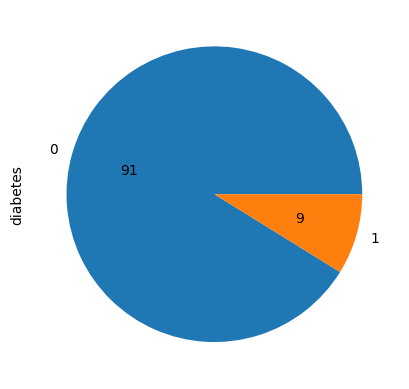

In [21]:
y.value_counts()
y.value_counts().plot.pie(autopct = '%.0f')

Text(0.5, 1.0, 'Over-sampling')

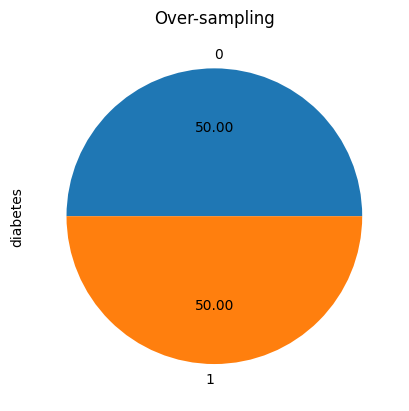

In [22]:
from imblearn.over_sampling import RandomOverSampler

#rus = RandomOverSampler(sampling_strategy = 1)
ros = RandomOverSampler(sampling_strategy = 'not majority') #String

x_ros, y_ros = ros.fit_resample(X,y)

ax = y_ros.value_counts().plot.pie(autopct = '%.2f')
ax.set_title('Over-sampling')

In [23]:
x_ros.shape, y_ros.shape

((175260, 15), (175260,))

## Splitting, Tuning and Model Building

### Data Splitting

For our data splitting, the dataset contains 100,000 samples of data. The splitting would be done in the ratio 90:5:5, which implies 90000 data point for training, 5000 data points for dev set and 5000 data points for test set.

This is because 5% (5,000) samples is enough for each of our development and test sets.

> <b>NOTE</b>: Both dev set and test sets are referred to as validation dataset in our code.

##### Training Set and Validation Set

We will first split our data into 90% (90,000) for training, `X_train` and `y_train` while the reamining 10% (10,000) for validation, `X_val` and `y_val`

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# 90,000 data points for training of dataset
X_train, X_val, y_train, y_val = train_test_split(x_ros, y_ros, test_size=0.1, random_state=123)

##### Validation Set - Dev and Test set
We are going to use about 10,000 data points for our validation test set. The `X_dev` and `y_dev` is the training dataset in the validation cycle, while the `X_test` and `y_test` are the test dataset in the validation cycle.

In [26]:
X_dev, X_test, y_dev, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=123)

In [3]:
print(f'Shape of X_train {X_train.shape}    Shape of y_train {y_train.shape}')
print(f'Shape of X_dev {X_dev.shape}       Shape of y_dev {y_dev.shape}')
print(f'Shape of X_test {X_test.shape}      Shape of y_test {y_test.shape}')

NameError: name 'X_train' is not defined

### Method 2 - Cross Validation
We have a total of 10,000 datasets, we would carry out cross validation to make sure we immerse the whole of our dataset into model training and test. For this we would have a kfold of 5.

In [4]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=123)

NameError: name 'x_ros' is not defined

#### Cross Validation using F1 score as evaluation metrics

In [2]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score, accuracy_score
import numpy as np

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scaler = StandardScaler().fit(X_train_val)
X_train_val_scaled = scaler.transform(X_train_val)

param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=500)
}

nbmodel_grid = GridSearchCV(estimator=GaussianNB(),
                param_grid=param_grid_nb, verbose=1,cv=kf, n_jobs=-1)

nbmodel_grid.fit(X_train_val_scaled, y_train_val)
print(nbmodel_grid.best_estimator_)
print(nbmodel_grid.best_params_)


NameError: name 'X_train_val' is not defined

In [1]:
y_pred = nbmodel_grid.predict(scaler.transform(X_test))
print(f1_score(y_test, y_pred), ": is the f1 score")
print(accuracy_score(y_test, y_pred), ": is the accuracy score")

NameError: name 'nbmodel_grid' is not defined